In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
with open("C:/Users/hugom/OneDrive/Documents/CASE_IA/EyeNavGS_Software/utils/AddEyeGazeTracking/datagaze.txt", 'r') as f:
    data = f.readlines()[:int(len(data)/2)]
    f.close()

In [29]:
x = np.zeros(len(data))
y = np.zeros(len(data))
for i in range(len(data)):
    data[i] = data[i][:-2]
    x[i]= float(data[i].split(";")[0])
    y[i]= float(data[i].split(";")[1])


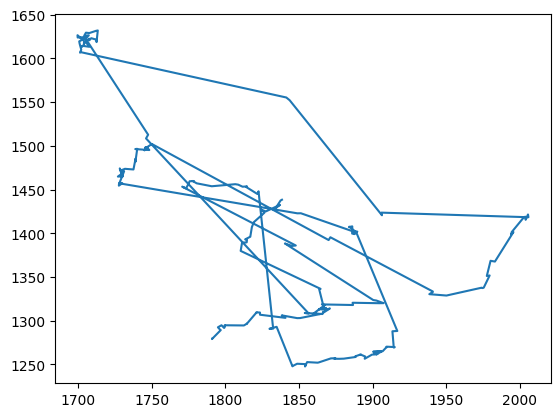

In [30]:
plt.plot(x,y)
plt.show()

10 0.14
26 0.364
8 0.112
5 0.07
7 0.098
58 0.812
11 0.154
7 0.098
2 0.028
1 0.014
1 0.014
1 0.014
1 0.014
3 0.042
1 0.014
5 0.07
4 0.056
5 0.07
5 0.07
2 0.028
15 0.21
27 0.378
13 0.182
2 0.028
3 0.042
6 0.084
2 0.028
[0.014, 0.14, 0.364, 0.112, 0.07, 0.098, 0.812, 0.154, 0.098, 0.028, 0.014, 0.014, 0.014, 0.014, 0.042, 0.014, 0.07, 0.056, 0.07, 0.07, 0.028, 0.21, 0.378, 0.182, 0.028, 0.042, 0.084]
3.2199999999999993


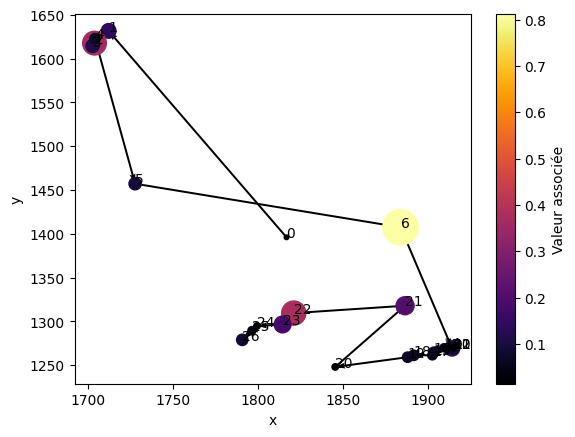

In [128]:

dx = np.diff(x)
dy = np.diff(y)
points_scatter_x = []
points_scatter_y = []
c = []
s= []
dt_ = 0.014
dt = dt_
threshold = 30
speed = np.sqrt(dx**2 + dy**2) / dt + 0.0001
last = -1
t_tot=0
for i in range(len(dx)):
    if speed[i]<threshold:
        points_scatter_x.append(x[i])
        points_scatter_y.append(y[i]) 
        s.append(round(dt*800))
        c.append(dt)
        
        dt = (i-last)*dt_
        print(i-last,dt)
        last = i

dx = np.diff(points_scatter_x)
dy = np.diff(points_scatter_y)

for i, (px, py) in enumerate(zip(points_scatter_x, points_scatter_y)):
    plt.text(px, py, str(i), fontsize=10, color="black")
plt.quiver(
    points_scatter_x[:-1], points_scatter_y[:-1],         # point de départ
    dx, dy,                 # vecteur (direction)
    angles='xy', scale_units='xy', scale=1,
    color='black', width=0.005
)

print(c)
tot = 0
for i in c:
    tot+=i
print(tot)
plt.scatter(points_scatter_x,points_scatter_y,c=c, cmap='inferno',s=s)
plt.colorbar(label='Valeur associée')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("gaze")
plt.show()